In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 데이터셋 디렉터리 경로
dataset_dir = 'D:/Recycling_Keras/dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 150
image_height = 150

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 15492 images belonging to 5 classes.
Found 1934 images belonging to 5 classes.
Found 1941 images belonging to 5 classes.


In [3]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [4]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(32, 150, 150, 3)

In [5]:
data_batch[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

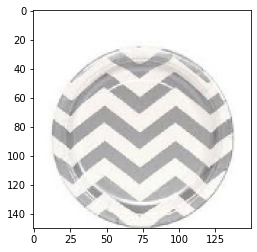

In [6]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [7]:
# 첫 번째 라벨 배치 출력
labels_batch[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [8]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4}

In [9]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic', 4: 'trash'}

In [10]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'trash'

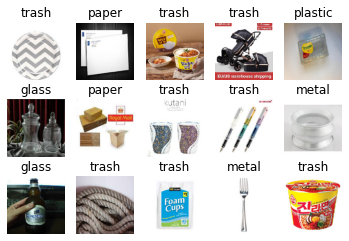

In [11]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [12]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

In [ ]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit_generator(train_generator,
                              steps_per_epoch=15492 / 32,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=1934 / 32)

Epoch 1/100
 56/484 [==>...........................] - ETA: 2:10 - loss: 1.9226 - accuracy: 0.3036

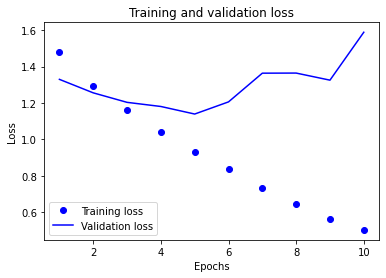

In [14]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

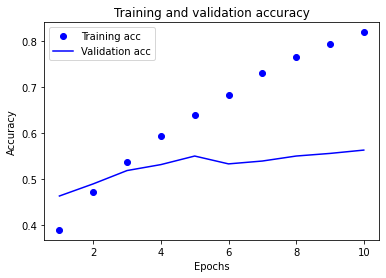

In [15]:
acc = history.history['accuracy']           # 훈련 정확도
val_acc = history.history['val_accuracy']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# 모델 저장
model.save('./model/image_size_down.h5')

In [17]:
# 저장된 모델 파일 로드
model = models.load_model('./model/image_size_down.h5')

In [18]:
# 테스트셋 평가
results = model.evaluate_generator(test_generator)
results

Instructions for updating:
Please use Model.evaluate, which supports generators.


[1.5886915922164917, 0.5842349529266357]

In [19]:
# 테스트셋 예측
results = model.predict_generator(test_generator)
results

Instructions for updating:
Please use Model.predict, which supports generators.


array([[3.10999341e-03, 1.90999761e-01, 1.38412938e-01, 5.16756810e-02,
        6.15801692e-01],
       [3.84285158e-06, 7.96444874e-06, 9.99884248e-01, 3.68642941e-06,
        1.00288373e-04],
       [3.66792869e-06, 2.03545515e-05, 4.45618934e-04, 1.18192465e-05,
        9.99518514e-01],
       ...,
       [2.98860427e-02, 6.61932230e-02, 6.09884620e-01, 1.50749143e-02,
        2.78961211e-01],
       [4.93308092e-14, 1.01463478e-08, 1.09751882e-05, 1.31198058e-05,
        9.99975920e-01],
       [9.58106875e-01, 1.88064501e-02, 1.66790138e-04, 5.33186411e-03,
        1.75879635e-02]], dtype=float32)

In [20]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results

array([4, 2, 4, ..., 2, 4, 0], dtype=int64)

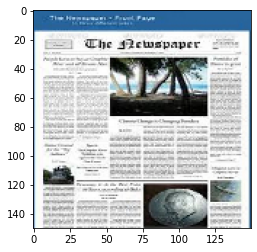

In [21]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [22]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]

'paper'